# Classification with SVM on the D-Wave Advantage Quantum Annealer

#### This notebook performs the evaluation and visualization of the results returned from the quantum annealer. The results have to be obtained with another script (e.g. submit_experiments.sh).

The classification map that is reported in the paper is the one obtained with the following parameters:

- B = 3
- K = 2
- gamma = -1
- xi = 5
- E = 0
- embedding 2
- annealing time = 100
- rel. chain strength = 0.5
- Energy -45.506845443310596 

On test data
- Overal accuracy 0.873516
- F1 score 0.7344402173456618


## Import Packages

In [9]:
import numpy as np
import glob
from utils import *
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from quantum_SVM import *   # QA SVM


## Load the training and test sets

X_train (50, 8)
Y_train (50,)
X_test (250000, 8)
Y_test (250000,)


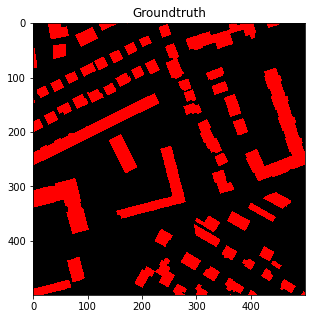

In [10]:
# Load training set
key='_tiny'
X_train=np.load('X_train_tile_4'+key+'.npy')
Y_train=np.load('Y_train_tile_4'+key+'.npy')

print('X_train',X_train.shape) 
print('Y_train',Y_train.shape) 

# Load test set
X_test=np.load('X_test_tile_8_subregion.npy')
Y_test=np.load('Y_test_tile_8_subregion.npy')

print('X_test',X_test.shape) 
print('Y_test',Y_test.shape) 

# for training, the labels have to be -1,+1; i.e., replace 0 -> -1
Y_train=np.where(Y_train==0,-1,Y_train)

groundtruth=np.reshape(Y_test,(500,500))
plt.title('Groundtruth')
cmap = colors.ListedColormap(['black', 'red'])
plt.rcParams["figure.figsize"] = (5,5)
view=plt.imshow(groundtruth,cmap=cmap)

## QSVM

### Parameters

In [13]:
outputpath='output/run_calibtrain'+key
maxalphas=20 # the 20 lowest-energy results returned by the quantum annealer are stored, but for the evaluation, we can consider less and compare

# Parameters 
Bs=[2,3] #[2,3,5,10]                      Base
Ks=[2] #[2,3]                             Number of qubits
xis=[0,1,5] #[0,1,5]                      Strength to consider the constraint
gammas=[-1] #[-1,0.125,0.25,0.5,1,2,4,8]  Kernel
Es=[0,1,2] #[0,1,2]                       Exponent
annealing_times=[1,10,100]
chain_strengths=[0.2,0.5,1,2,5]
embeddings=[0,1,2,3]

### Evaluation

B = 2, K = 2, gamma = -1, xi = 0, E = 0,
  embedding 0, annealing time = 100, rel. chain strength = 0.5
Energy -63.576530966387956
On test data
Overal accuracy 0.86842
F1 score 0.7326283619575554


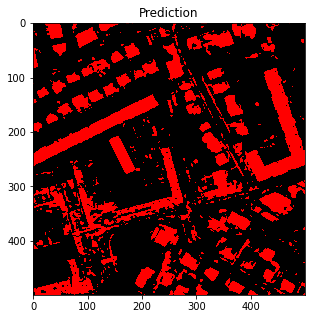

B = 2, K = 2, gamma = -1, xi = 0, E = 0,
  embedding 3, annealing time = 1, rel. chain strength = 0.5
Energy -70.07246567078842
On test data
Overal accuracy 0.84796
F1 score 0.7101128737034776


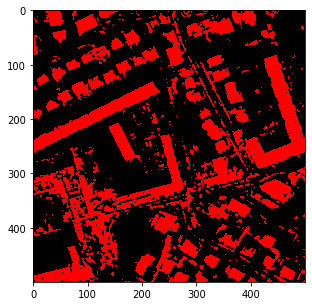

B = 2, K = 2, gamma = -1, xi = 0, E = 0,
  embedding 3, annealing time = 100, rel. chain strength = 0.5
Energy -64.84508239813442
On test data
Overal accuracy 0.877876
F1 score 0.7158400268049105


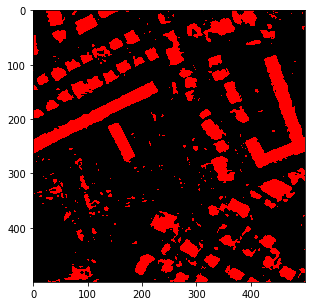

B = 2, K = 2, gamma = -1, xi = 0, E = 1,
  embedding 2, annealing time = 10, rel. chain strength = 0.2
Energy -38.65519361568767
On test data
Overal accuracy 0.868012
F1 score 0.7030427387348471


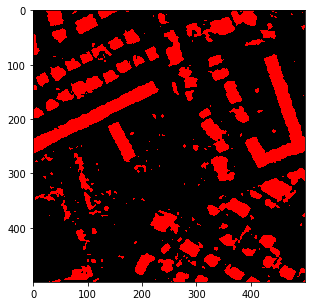

B = 2, K = 2, gamma = -1, xi = 0, E = 1,
  embedding 2, annealing time = 100, rel. chain strength = 0.2
Energy -39.17549258303925
On test data
Overal accuracy 0.889452
F1 score 0.7190133899976616


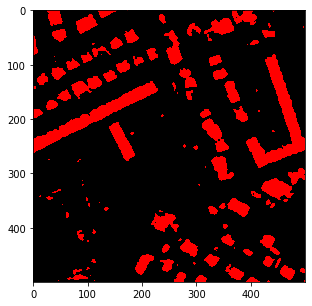

B = 2, K = 2, gamma = -1, xi = 0, E = 2,
  embedding 0, annealing time = 10, rel. chain strength = 0.2
Energy -20.652235656654433
On test data
Overal accuracy 0.888164
F1 score 0.7211878857986219


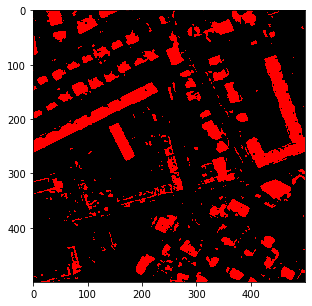

B = 2, K = 2, gamma = -1, xi = 1, E = 0,
  embedding 0, annealing time = 100, rel. chain strength = 0.5
Energy -38.660751305593045
On test data
Overal accuracy 0.845076
F1 score 0.7018651230457775


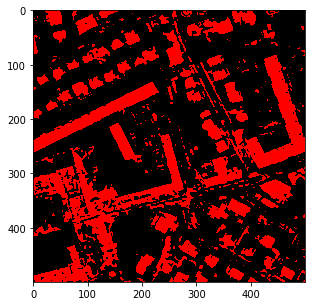

B = 2, K = 2, gamma = -1, xi = 1, E = 0,
  embedding 1, annealing time = 10, rel. chain strength = 0.5
Energy -28.59312172758268
On test data
Overal accuracy 0.845788
F1 score 0.7008867958197238


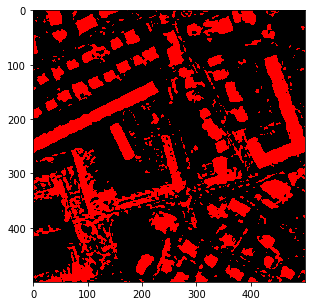

B = 2, K = 2, gamma = -1, xi = 1, E = 1,
  embedding 1, annealing time = 100, rel. chain strength = 0.5
Energy -24.946913849585172
On test data
Overal accuracy 0.879816
F1 score 0.726556243174372


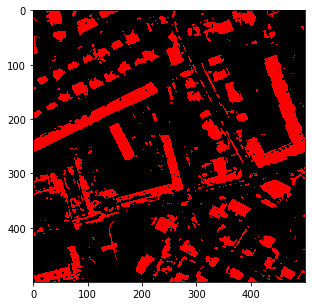

B = 2, K = 2, gamma = -1, xi = 1, E = 1,
  embedding 1, annealing time = 1, rel. chain strength = 1
Energy -17.077607919194183
On test data
Overal accuracy 0.859328
F1 score 0.7156624947446718


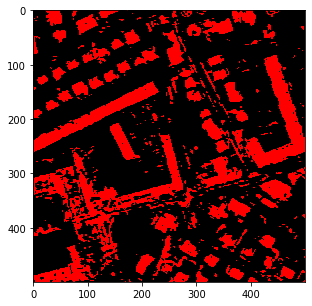

B = 2, K = 2, gamma = -1, xi = 1, E = 1,
  embedding 2, annealing time = 10, rel. chain strength = 0.5
Energy -25.241573461584892
On test data
Overal accuracy 0.865208
F1 score 0.7028761881249229


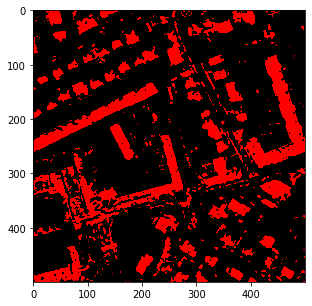

B = 2, K = 2, gamma = -1, xi = 1, E = 1,
  embedding 2, annealing time = 100, rel. chain strength = 0.5
Energy -24.475775335015406
On test data
Overal accuracy 0.887352
F1 score 0.7155008687921768


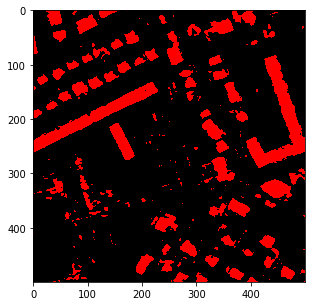

B = 2, K = 2, gamma = -1, xi = 1, E = 1,
  embedding 3, annealing time = 10, rel. chain strength = 0.5
Energy -20.584173298714248
On test data
Overal accuracy 0.873544
F1 score 0.7167051992042585


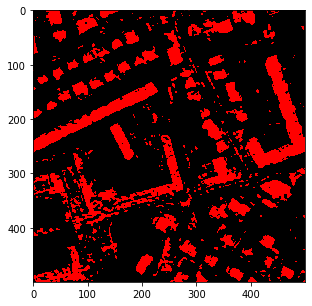

B = 2, K = 2, gamma = -1, xi = 1, E = 2,
  embedding 2, annealing time = 100, rel. chain strength = 0.2
Energy -15.571795807843738
On test data
Overal accuracy 0.857188
F1 score 0.7195871916307344


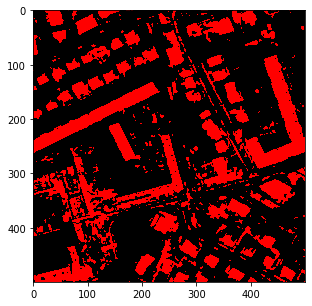

B = 2, K = 2, gamma = -1, xi = 5, E = 0,
  embedding 0, annealing time = 10, rel. chain strength = 0.5
Energy -49.52057699067239
On test data
Overal accuracy 0.88016
F1 score 0.728608438864431


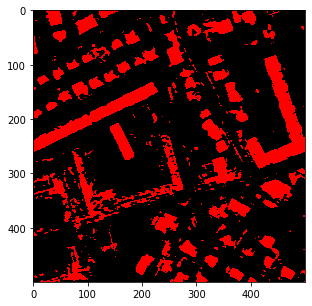

B = 2, K = 2, gamma = -1, xi = 5, E = 0,
  embedding 0, annealing time = 1, rel. chain strength = 1
Energy -35.00944361040178
On test data
Overal accuracy 0.854612
F1 score 0.7104908918572327


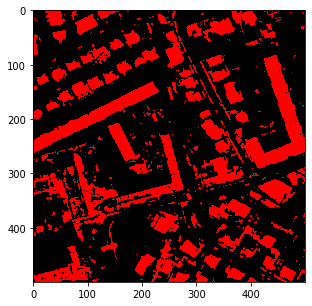

B = 2, K = 2, gamma = -1, xi = 5, E = 0,
  embedding 1, annealing time = 1, rel. chain strength = 0.5
Energy -51.22353270783232
On test data
Overal accuracy 0.862656
F1 score 0.7112000807455506


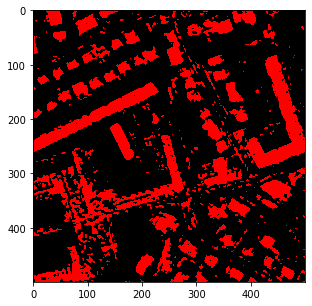

B = 2, K = 2, gamma = -1, xi = 5, E = 0,
  embedding 1, annealing time = 10, rel. chain strength = 0.5
Energy -46.22601878543993
On test data
Overal accuracy 0.862024
F1 score 0.717900487421898


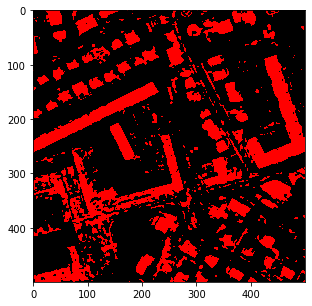

B = 3, K = 2, gamma = -1, xi = 0, E = 0,
  embedding 1, annealing time = 10, rel. chain strength = 2
Energy -71.4961865237801
On test data
Overal accuracy 0.840008
F1 score 0.7030674664449459


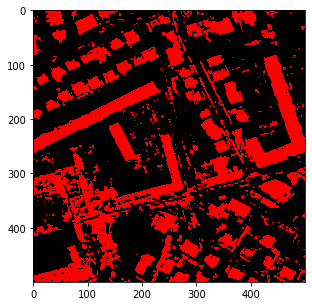

B = 3, K = 2, gamma = -1, xi = 0, E = 0,
  embedding 1, annealing time = 100, rel. chain strength = 5
Energy -57.971641450473626
On test data
Overal accuracy 0.852416
F1 score 0.7174971670086675


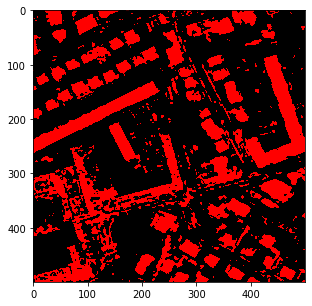

B = 3, K = 2, gamma = -1, xi = 0, E = 0,
  embedding 3, annealing time = 1, rel. chain strength = 2
Energy -78.40885247496453
On test data
Overal accuracy 0.865312
F1 score 0.7132980263269927


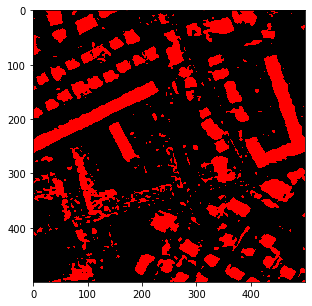

B = 3, K = 2, gamma = -1, xi = 0, E = 2,
  embedding 1, annealing time = 100, rel. chain strength = 1
Energy -11.503963942188145
On test data
Overal accuracy 0.882028
F1 score 0.7207128720371967


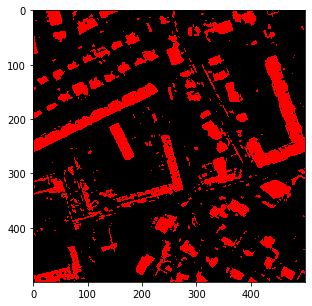

B = 3, K = 2, gamma = -1, xi = 0, E = 2,
  embedding 1, annealing time = 1, rel. chain strength = 2
Energy -11.399774035125132
On test data
Overal accuracy 0.882368
F1 score 0.7165275394729232


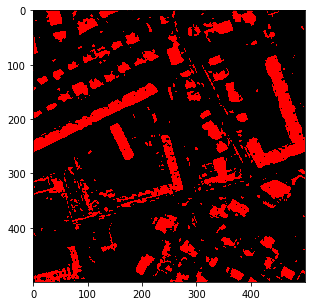

B = 3, K = 2, gamma = -1, xi = 0, E = 2,
  embedding 2, annealing time = 10, rel. chain strength = 0.2
Energy -12.269963970450435
On test data
Overal accuracy 0.884696
F1 score 0.7036679139767261


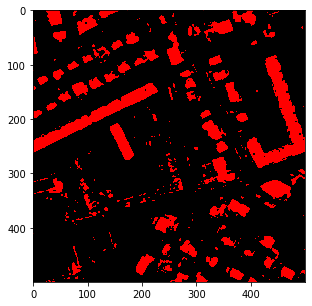

B = 3, K = 2, gamma = -1, xi = 0, E = 2,
  embedding 2, annealing time = 100, rel. chain strength = 0.2
Energy -12.051694743974974
On test data
Overal accuracy 0.884484
F1 score 0.7337531230696894


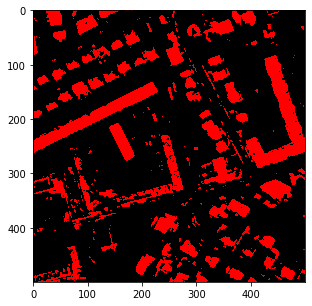

B = 3, K = 2, gamma = -1, xi = 1, E = 0,
  embedding 1, annealing time = 100, rel. chain strength = 0.5
Energy -17.912004495524627
On test data
Overal accuracy 0.846016
F1 score 0.7009833620729832


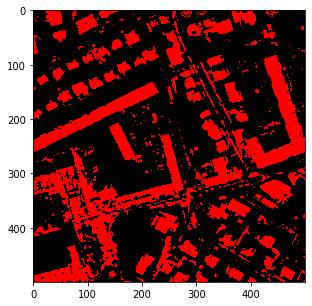

B = 3, K = 2, gamma = -1, xi = 1, E = 1,
  embedding 0, annealing time = 1, rel. chain strength = 0.2
Energy -18.20281620772596
On test data
Overal accuracy 0.86164
F1 score 0.7187393277064936


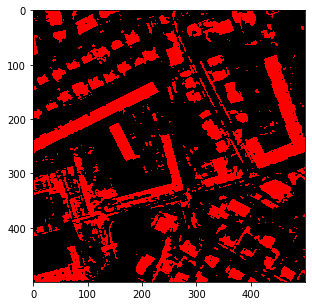

B = 3, K = 2, gamma = -1, xi = 1, E = 1,
  embedding 1, annealing time = 10, rel. chain strength = 0.5
Energy -20.175029096824993
On test data
Overal accuracy 0.864616
F1 score 0.7201144482667372


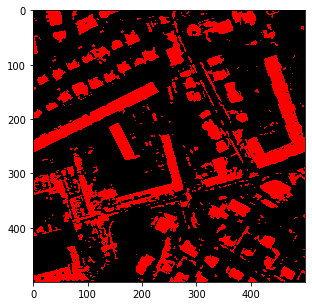

B = 3, K = 2, gamma = -1, xi = 1, E = 1,
  embedding 2, annealing time = 100, rel. chain strength = 0.5
Energy -20.659998098494363
On test data
Overal accuracy 0.884052
F1 score 0.7282681040543707


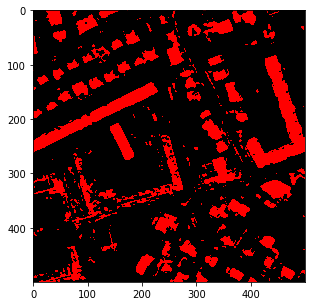

B = 3, K = 2, gamma = -1, xi = 1, E = 2,
  embedding 2, annealing time = 10, rel. chain strength = 0.5
Energy -8.640766055370284
On test data
Overal accuracy 0.846384
F1 score 0.7060363435954746


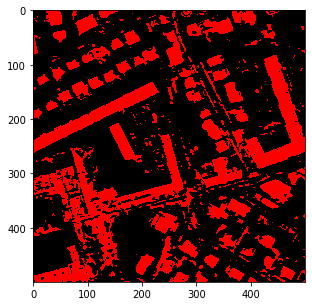

B = 3, K = 2, gamma = -1, xi = 1, E = 2,
  embedding 2, annealing time = 100, rel. chain strength = 0.5
Energy -8.614799617154471
On test data
Overal accuracy 0.873596
F1 score 0.7318745280377401


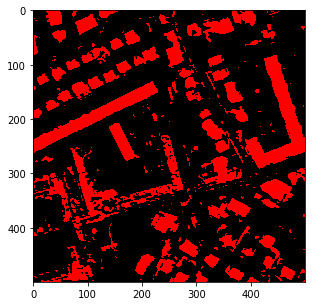

B = 3, K = 2, gamma = -1, xi = 1, E = 2,
  embedding 2, annealing time = 10, rel. chain strength = 1
Energy -7.426846642711299
On test data
Overal accuracy 0.85826
F1 score 0.7184055563943832


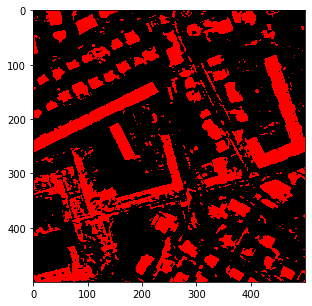

B = 3, K = 2, gamma = -1, xi = 5, E = 0,
  embedding 2, annealing time = 100, rel. chain strength = 0.5
Energy -45.506845443310596
On test data
Overal accuracy 0.873516
F1 score 0.7344402173456618


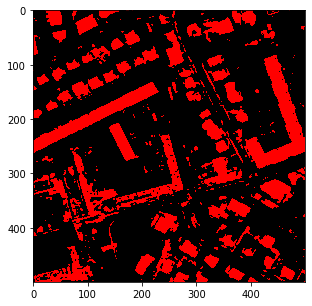

B = 3, K = 2, gamma = -1, xi = 5, E = 1,
  embedding 0, annealing time = 100, rel. chain strength = 0.5
Energy -23.736552843941126
On test data
Overal accuracy 0.884704
F1 score 0.7175225401803215


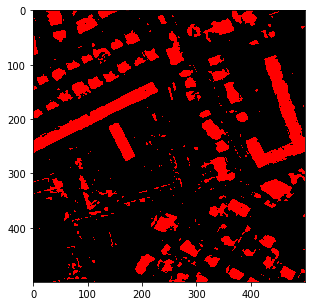

B = 3, K = 2, gamma = -1, xi = 5, E = 1,
  embedding 2, annealing time = 10, rel. chain strength = 0.5
Energy -23.863110771134867
On test data
Overal accuracy 0.88446
F1 score 0.7171880354432859


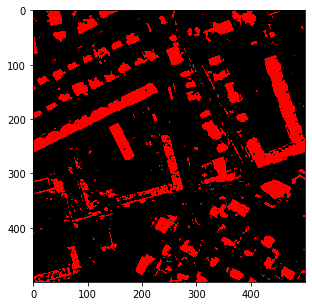

B = 3, K = 2, gamma = -1, xi = 5, E = 1,
  embedding 3, annealing time = 10, rel. chain strength = 0.2
Energy -23.79218276655323
On test data
Overal accuracy 0.878908
F1 score 0.7264545627050033


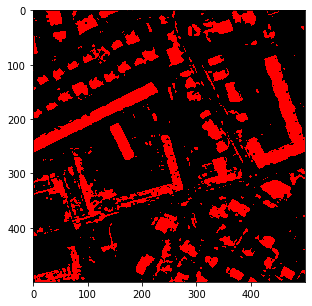

In [14]:
cmap = colors.ListedColormap(['black', 'red'])
plt.title('Prediction')
plt.rcParams["figure.figsize"] = (5,5)
Y_train_bin=np.where(Y_train==-1,0,Y_train)

for B in Bs:
    for K in Ks:
        for gamma in gammas:
            for xi in xis:
                for E in Es:
                    dirs=glob.glob(outputpath+f'_B={B}_K={K}_xi={xi}_E={E}_gamma={gamma}/result_couplers=*')
                    if not dirs:
                        dirs=glob.glob(outputpath+f'_B={B}_K={K}_xi={xi}_E={E}_gamma={float(gamma)}/result_couplers=*')
                    path=dirs[0]+'/'
                    f = open(path+f'collected_data_all_embeddings_maxalphas{maxalphas}.txt',"w") 
                    f.write("#rcs \tt_a \t trainacc\t trainF1score\t testacc\t testF1score\t average energy(train)\n") 
                    for emb in embeddings:
                        for c in chain_strengths:
                            for t in annealing_times:
                                alphas=np.load(path+f'embedding{emb}_rcs{c}_ta{t}_alphas.npy')
                                if not maxalphas == 0 or maxalphas > len(alphas):
                                    alphas = alphas[0:maxalphas]

                                scores_train=predict(X_train,X_train,Y_train,alphas,path)
                                Y_predict_train=np.sign(scores_train)
                                Y_predict_train=np.where(Y_predict_train==-1,0,Y_predict_train)
                                Y_predict_train=np.where(Y_predict_train==1,1,Y_predict_train)

                                scores=predict(X_test,X_train,Y_train,alphas,path)
                                Y_predict=np.sign(scores)
                                Y_predict=np.where(Y_predict==-1,0,Y_predict)   # From -1 to 0
                                Y_predict=np.where(Y_predict==1,1,Y_predict)    # From -1 to 1
        
                                trainacc = accuracy_score(Y_train_bin[:], Y_predict_train)
                                trainF1score = f1_score(Y_train_bin[:], Y_predict_train)
                                testacc = accuracy_score(Y_test[:], Y_predict)
                                testF1score = f1_score(Y_test[:], Y_predict)
                                alphas_avg = np.mean(alphas,axis=0)
                                av_energy = compute_energy(alphas_avg,X_train,Y_train,gamma,xi)
                
                                f.write(f'{c:1.2f}\t {t:4}\t {trainacc:8.4f}\t{trainF1score:8.4f}\t{testacc:8.4f}\t{testF1score:8.4f}\t{av_energy:8.4f}')
                                f.write("\n")

                                #  Visualize the prediction only for reasonable solutions
                                if testacc > 0.75 and testF1score > 0.7: 
                                    print(f'B = {B}, K = {K}, gamma = {gamma}, xi = {xi}, E = {E},\n  embedding {emb}, annealing time = {t}, rel. chain strength = {c}')
                                    #print('On train data:')
                                    #print ('Overal accuracy',trainacc)
                                    #print ('F1 score',trainF1score)
                                    print('Energy',av_energy)
                                    print('On test data')
                                    print ('Overal accuracy',testacc)
                                    print ('F1 score',testF1score)
                                    classification_map=np.reshape(Y_predict,(500,500))
                                    plt.imshow(classification_map, cmap=cmap)
                                    plt.clim(0, 1)
                                    plt.show()
                
                            f.write("\n")
                        f.write("\n")
                    f.close()
        